# Logistic Regression
we'll use our existing knowledge of PyTorch and linear regression to solve a very different kind of problem: image classification.

We'll use the famous [MNIST Handwritten Digits Database](https://jovian.ml/outlink?url=http%3A%2F%2Fyann.lecun.com%2Fexdb%2Fmnist%2F) as our training dataset. It consists of 28px by 28px grayscale images of handwritten digits (0 to 9), along with labels for each image indicating which digit it represents. Here are some sample images from the dataset:

![Sample Image](https://i.imgur.com/CAYnuo1.jpg)

In [1]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
# Downloading Training DataSet
dataset = MNIST(root='data/', download = True)

In [3]:
# Lets check the length of the dataset
len(dataset)

60000

- So this **dataset contains 60,000 images** which can be used to train the model.
- There is also an **additional test set of 10,000 images** which can be created by passing `train = False` to the `MNIST` class

In [4]:
test_dataset = MNIST(root='data/', train=False)
print('The length of the Test Dataset is: ',len(test_dataset))

The length of the Test Dataset is:  10000


Let's look at a sample element from the training dataset

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F3620EC8650>, 5)

So it's a **pair**, consisting of a **28x28 image** and a **label**. **The image is an object of the class `PIL.Image.Image`**, which is a part of the Python imaging library **Pillow**. We can view the image within Jupyter using **matplotlib**, the de-facto plotting and graphing library for data science in Python.

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

Label:  5


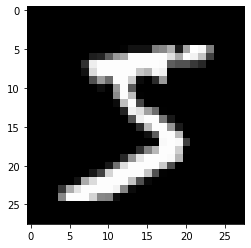

In [7]:
image,label = dataset[0]
plt.imshow(image,cmap='gray')
print('Label: ',label)

- It's evident that these **images are quite small in size**, and recognizing the digits can sometimes be hard even for the human eye. While it's useful to look at these images, 
- **there's just one problem here**: 
  - PyTorch doesn't know how to work with images. 
  - **We need to convert the images into tensors**. 
We can do this by specifying a transform while creating our dataset.

In [8]:
import torchvision.transforms as transforms

PyTorch datasets allow us to specify one or more transformation functions which are applied to the images as they are loaded. `torchvision.transforms` contains many such predefined functions, and 
- **we'll use the `ToTensor` transform to convert images into PyTorch tensors.**

In [9]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/',
                train=True,
                transform=transforms.ToTensor()
               )

In [10]:
dataset # This is our dataset in tensor format

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
    StandardTransform
Transform: ToTensor()

### Lets check how are the dataElements now

In [11]:
dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [12]:
img_tensor, label = dataset[0]
print(img_tensor.shape,label)

torch.Size([1, 28, 28]) 5


We can see that now the img_tensor is of shape `one by 28 by 28`, so the first dimension is to keep track of color channels since images in the MNIST dataset are grayscale, there's just one channel. and the 2nd and the 3rd dimension is the height and width of the img_tensor.
- **In case of colored images**
  - There can be three channels. Since this is a grayscale image this image contains only channel

The image is now converted to a 1x28x28 tensor. The first dimension is used to keep track of the color channels. Since images in the MNIST dataset are grayscale, there's just one channel. Other datasets have images with color, in which case there are 3 channels: red, green and blue (RGB). 
- Let's look at some sample values inside the tensor:

In [13]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


The values range from 0 to 1, with 0 representing black, 1 white and the values in between different shades of grey. We can also plot the tensor as an image using plt.imshow.

#### Lets plot the image

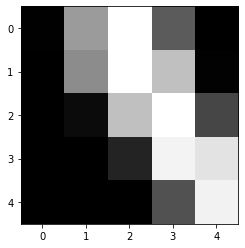

In [14]:
# PLotting the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

We can also plot the entire image by

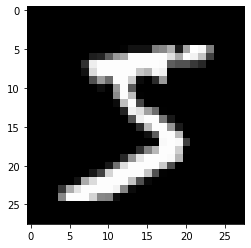

In [15]:
plt.imshow(img_tensor[0,:,:], cmap='gray');

# --------We are done with Understanding the Dataset--------

**------------NOW--------------**

# Training and Validation Datasets

While building real world machine learning models, it is quite common to split the dataset into 3 parts:
1. **Training set**<br>
_used to train the model i.e. compute the loss and adjust the weights of the model using gradient descent._

2. **Validation set**<br>
_used to evaluate the model while training, adjust hyperparameters (learning rate etc.) and pick the best version of the model._

3. **Test set**<br>
_used to compare different models, or different types of modeling approaches, and report the final accuracy of the model._

In the MNIST dataset, there are "60,000 training images", and "10,000 test images". The test set is standardized so that different researchers can report the results of their models against the same set of images.

Since there's no predefined validation set, we must manually split the 60,000 images into training and validation datasets. Let's set aside 10,000 randomly chosen images for validation. We can do this using the `random_spilt` method from PyTorch.

In [16]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
print('Length of Training Dataset: \n', len(train_ds))
print('Length of Validation Dataset: \n', len(val_ds))

Length of Training Dataset: 
 50000
Length of Validation Dataset: 
 10000


It's important to choose a random sample for creating a validation set, because training data is often ordered by the target labels i.e. images of 0s, followed by images of 1s, followed by images of 2s and so on. If we were to pick a 20% validation set simply by selecting the last 20% of the images, the validation set would only consist of images of 8s and 9s, whereas the training set would contain no images of 8s and 9s. This would make it impossible to train a good model using the training set, which also performs well on the validation set (and on real world data).

**We can now created data loaders to help us load the data in batches. We'll use a batch size of 128.**

In [17]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

# Model

- A logistic regression model is almost identical to a linear regression model i.e. there are weights and bias matrices, and the output is obtained using simple matrix operations (pred = x @ w.t() + b).

- Just as we did with linear regression, we can use nn.Linear to create the model instead of defining and initializing the matrices manually.
- Since nn.Linear expects the each training example to be a vector, each 1x28x28 image tensor needs to be flattened out into a vector of size 784 (28*28), before being passed into the model.
- The output for each image is vector of size 10, with each element of the vector signifying the probability a particular target label (i.e. 0 to 9). The predicted label for an image is simply the one with the highest probability.

In [18]:
import torch.nn as nn
    
input_size = 28*28    # Number of inputs
num_classes = 10    # NUmber of Outputs

#Logisitc regression model
model = nn.Linear(input_size, num_classes)

Of course, this model is a lot larger than our previous model, in terms of the number of parameters. 
- **Let's take a look at the weights and biases.**

In [19]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-2.3575e-02, -1.4625e-03,  1.3273e-02,  ...,  7.7385e-03,
         -1.2386e-02,  5.5074e-03],
        [ 1.1542e-02, -1.7652e-02, -1.4598e-03,  ..., -3.7461e-03,
          2.3821e-02,  4.4339e-03],
        [ 6.1097e-04,  9.1090e-03, -2.9544e-03,  ...,  8.6458e-03,
         -1.9736e-02,  8.4858e-03],
        ...,
        [ 2.2906e-02, -1.0002e-02, -1.3825e-02,  ...,  3.9481e-03,
         -2.9767e-02,  2.8645e-02],
        [-1.1752e-02,  2.2931e-02,  2.7294e-02,  ...,  1.5621e-02,
          1.5407e-02,  2.6577e-02],
        [ 6.6910e-05,  1.9450e-02,  2.2937e-02,  ..., -4.0458e-03,
          9.2537e-03,  2.6630e-02]], requires_grad=True)

- We have 784 inputs and 10 outputs 
    - So the model has 784 weights and 10 biases 

In [20]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0093,  0.0198, -0.0346,  0.0152, -0.0082,  0.0338,  0.0144,  0.0237,
         0.0027,  0.0004], requires_grad=True)

Although there are a total of 7850 parameters here, conceptually nothing has changed so far.
##### Let's try and generate some outputs using our model. We'll take the first batch of 100 images from our dataset, and pass them into our model.

In [21]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    break

tensor([6, 8, 1, 7, 0, 6, 7, 7, 5, 7, 7, 5, 8, 6, 8, 9, 8, 4, 7, 7, 4, 2, 9, 7,
        2, 6, 8, 8, 0, 1, 1, 3, 4, 5, 2, 6, 7, 8, 5, 3, 2, 6, 6, 4, 6, 9, 8, 9,
        0, 4, 4, 3, 9, 1, 0, 8, 6, 7, 2, 4, 1, 5, 2, 3, 2, 9, 3, 8, 8, 5, 0, 3,
        3, 5, 9, 4, 0, 1, 8, 5, 9, 4, 8, 9, 9, 8, 5, 5, 9, 4, 9, 4, 9, 1, 1, 0,
        1, 1, 7, 0, 5, 1, 8, 7, 4, 6, 9, 3, 8, 3, 5, 6, 7, 4, 8, 2, 5, 0, 7, 5,
        7, 5, 8, 3, 3, 8, 3, 0])
torch.Size([128, 1, 28, 28])


RuntimeError: size mismatch, m1: [3584 x 28], m2: [784 x 10] at /opt/conda/conda-bld/pytorch_1587428190859/work/aten/src/TH/generic/THTensorMath.cpp:41

# Now Flattening the input Size

In [22]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [23]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0039,  0.0016, -0.0218,  ..., -0.0072,  0.0230,  0.0265],
         [-0.0137,  0.0185, -0.0095,  ..., -0.0256, -0.0031, -0.0026],
         [-0.0265, -0.0029, -0.0349,  ..., -0.0200,  0.0294,  0.0299],
         ...,
         [-0.0150,  0.0186, -0.0094,  ...,  0.0220, -0.0179,  0.0340],
         [ 0.0162, -0.0101, -0.0290,  ...,  0.0214, -0.0021, -0.0185],
         [ 0.0065, -0.0010,  0.0131,  ...,  0.0112,  0.0036, -0.0244]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0230, -0.0182, -0.0049, -0.0098, -0.0067, -0.0245, -0.0121,  0.0342,
          0.0250,  0.0047], requires_grad=True)]

Our new custom model can be used in the exact same way as before. Let's see if it works.



In [24]:
for images, labels in train_loader:
    print('images.shape', images.shape)
    outputs = model(images)
    break
    
print('outputs.shape: ', outputs.shape)
print('Sample outputs: \n', outputs[:2].data)

images.shape torch.Size([128, 1, 28, 28])
outputs.shape:  torch.Size([128, 10])
Sample outputs: 
 tensor([[-0.1187,  0.1258,  0.1650,  0.1532,  0.1180,  0.0266, -0.0994, -0.0353,
          0.0355, -0.1922],
        [ 0.1637, -0.0334,  0.6733,  0.1138, -0.1955,  0.0968, -0.4405,  0.0232,
          0.6038,  0.4732]])


In [25]:
outputs[0]

tensor([-0.1187,  0.1258,  0.1650,  0.1532,  0.1180,  0.0266, -0.0994, -0.0353,
         0.0355, -0.1922], grad_fn=<SelectBackward>)

In [28]:
exps = torch.exp(outputs[0])
exps

tensor([0.8881, 1.1340, 1.1794, 1.1655, 1.1253, 1.0270, 0.9054, 0.9653, 1.0361,
        0.8251], grad_fn=<ExpBackward>)

In [31]:
probs = exps/torch.sum(exps)
probs

tensor([0.0866, 0.1106, 0.1151, 0.1137, 0.1098, 0.1002, 0.0883, 0.0942, 0.1011,
        0.0805], grad_fn=<DivBackward0>)

In [32]:
torch.sum(probs)

tensor(1.0000, grad_fn=<SumBackward0>)

In [34]:
import torch.nn.functional as F

In [35]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print('Sample probabilities: \n', probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities: 
 tensor([[0.0866, 0.1106, 0.1151, 0.1137, 0.1098, 0.1002, 0.0883, 0.0942, 0.1011,
         0.0805],
        [0.0961, 0.0789, 0.1600, 0.0915, 0.0671, 0.0899, 0.0525, 0.0835, 0.1493,
         0.1310]])
Sum:  1.0


In [36]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([2, 2, 2, 8, 2, 3, 2, 2, 8, 8, 2, 9, 3, 8, 3, 3, 2, 3, 8, 8, 5, 9, 2, 8,
        8, 2, 2, 3, 8, 2, 2, 8, 2, 8, 1, 8, 3, 2, 8, 9, 3, 8, 1, 3, 8, 9, 2, 2,
        2, 8, 8, 8, 2, 8, 8, 8, 8, 8, 2, 8, 8, 2, 8, 2, 3, 8, 3, 8, 8, 2, 2, 8,
        8, 2, 3, 3, 8, 8, 8, 2, 3, 2, 2, 3, 2, 9, 2, 8, 2, 8, 7, 8, 2, 2, 2, 2,
        2, 8, 2, 2, 8, 8, 8, 2, 8, 8, 2, 2, 8, 8, 2, 2, 2, 2, 2, 3, 2, 8, 2, 8,
        8, 9, 2, 8, 2, 3, 7, 3])
tensor([0.1151, 0.1600, 0.1181, 0.1470, 0.1246, 0.1318, 0.1327, 0.1293, 0.1346,
        0.1291, 0.1557, 0.1263, 0.1296, 0.1239, 0.1307, 0.1252, 0.1520, 0.1661,
        0.1263, 0.1755, 0.1233, 0.1196, 0.1493, 0.1454, 0.1304, 0.1134, 0.1863,
        0.1271, 0.1309, 0.1297, 0.1231, 0.1328, 0.1361, 0.1473, 0.1294, 0.1237,
        0.1227, 0.1287, 0.1245, 0.1665, 0.1283, 0.1257, 0.1273, 0.1294, 0.1558,
        0.1391, 0.1811, 0.1498, 0.1266, 0.1506, 0.1432, 0.1284, 0.1469, 0.1313,
        0.1465, 0.1227, 0.1188, 0.1459, 0.1183, 0.1258, 0.1388, 0.1449, 0.1583,
       

In [37]:
labels

tensor([2, 4, 1, 4, 5, 8, 5, 3, 2, 2, 2, 2, 8, 2, 8, 6, 3, 6, 4, 8, 3, 9, 0, 4,
        7, 1, 7, 6, 5, 9, 3, 0, 6, 7, 2, 3, 1, 3, 1, 9, 0, 9, 2, 1, 9, 9, 4, 8,
        0, 3, 9, 6, 0, 1, 4, 8, 2, 4, 1, 9, 7, 8, 4, 3, 3, 2, 6, 8, 7, 0, 6, 3,
        3, 4, 3, 4, 7, 0, 2, 6, 6, 1, 1, 2, 7, 4, 1, 2, 2, 3, 0, 8, 6, 4, 6, 4,
        2, 4, 4, 0, 4, 5, 2, 8, 7, 9, 4, 0, 1, 2, 1, 6, 7, 8, 5, 8, 3, 3, 1, 1,
        3, 9, 1, 6, 8, 6, 5, 2])

# Evaluation Metric and Loss Function

In [38]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [39]:
accuracy(outputs, labels)

tensor(0.1094)

In [ ]:
tensor(0.0938)

In [40]:
loss_fn = F.cross_entropy

In [42]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3055, grad_fn=<NllLossBackward>)



# Training the mOdel

for epoch in range(num_epochs):
    # Training phase
    for batch in train_loader:
        # Generate predictions
        # Calculate loss
        # Compute gradients
        # Update weights
        # Reset gradients
    
    # Validation phase
    for batch in val_loader:
        # Generate predictions
        # Calculate loss
        # Calculate metrics (accuracy etc.)
    # Calculate average validation loss & metrics
    
    # Log epoch, loss & metrics for inspection

In [43]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [44]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [45]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.2893917560577393, 'val_acc': 0.11827531456947327}

In [46]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9264, val_acc: 0.6519
Epoch [1], val_loss: 1.6649, val_acc: 0.7196
Epoch [2], val_loss: 1.4695, val_acc: 0.7484
Epoch [3], val_loss: 1.3215, val_acc: 0.7706
Epoch [4], val_loss: 1.2073, val_acc: 0.7853


In [47]:
history2 = fit(5, 0.001, model, train_loader, val_loader)


Epoch [0], val_loss: 1.1173, val_acc: 0.7970
Epoch [1], val_loss: 1.0447, val_acc: 0.8062
Epoch [2], val_loss: 0.9852, val_acc: 0.8142
Epoch [3], val_loss: 0.9354, val_acc: 0.8193
Epoch [4], val_loss: 0.8933, val_acc: 0.8236


In [48]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8572, val_acc: 0.8269
Epoch [1], val_loss: 0.8258, val_acc: 0.8305
Epoch [2], val_loss: 0.7983, val_acc: 0.8342
Epoch [3], val_loss: 0.7739, val_acc: 0.8376
Epoch [4], val_loss: 0.7523, val_acc: 0.8410


In [49]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7328, val_acc: 0.8431
Epoch [1], val_loss: 0.7152, val_acc: 0.8450
Epoch [2], val_loss: 0.6992, val_acc: 0.8475
Epoch [3], val_loss: 0.6846, val_acc: 0.8498
Epoch [4], val_loss: 0.6712, val_acc: 0.8521


In [50]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.6589, val_acc: 0.8541
Epoch [1], val_loss: 0.6475, val_acc: 0.8553
Epoch [2], val_loss: 0.6370, val_acc: 0.8568
Epoch [3], val_loss: 0.6271, val_acc: 0.8583
Epoch [4], val_loss: 0.6180, val_acc: 0.8593


In [51]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.6094, val_acc: 0.8608
Epoch [1], val_loss: 0.6013, val_acc: 0.8613
Epoch [2], val_loss: 0.5938, val_acc: 0.8622
Epoch [3], val_loss: 0.5866, val_acc: 0.8628
Epoch [4], val_loss: 0.5799, val_acc: 0.8635


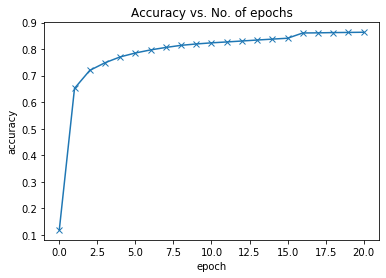

In [52]:
# Replace these values with your results
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

## Testing with individual images

In [53]:
# Define test dataset
test_dataset = MNIST(root='data/',
                    train= False,
                    transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


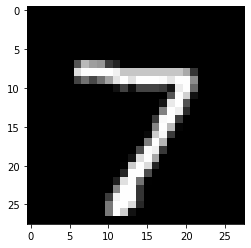

In [54]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [55]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [56]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


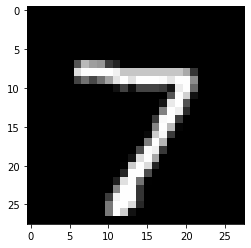

In [57]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


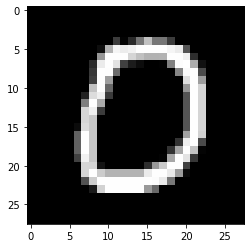

In [58]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 4


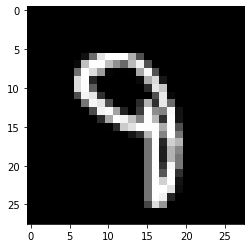

In [59]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 8


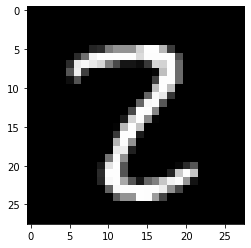

In [60]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 1 , Predicted: 1


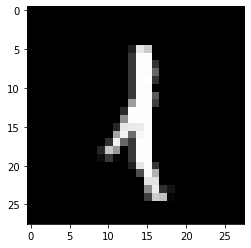

In [67]:
img, label = test_dataset[1988]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [69]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.5520429015159607, 'val_acc': 0.870312511920929}

# Saving and Loading the Model

In [70]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [71]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0317, -0.0349,  0.0247,  ..., -0.0218,  0.0003,  0.0063],
                      [ 0.0326,  0.0236,  0.0191,  ...,  0.0182, -0.0176, -0.0352],
                      [ 0.0269, -0.0325, -0.0146,  ...,  0.0268,  0.0199, -0.0305],
                      ...,
                      [ 0.0231, -0.0179, -0.0219,  ..., -0.0211,  0.0190,  0.0296],
                      [ 0.0182, -0.0038,  0.0069,  ...,  0.0174, -0.0058,  0.0163],
                      [-0.0267, -0.0297,  0.0331,  ...,  0.0216, -0.0104,  0.0205]])),
             ('linear.bias',
              tensor([-0.0329,  0.1002, -0.0187, -0.0599,  0.0294,  0.0795, -0.0359,  0.0361,
                      -0.1160, -0.0216]))])

In [72]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0317, -0.0349,  0.0247,  ..., -0.0218,  0.0003,  0.0063],
                      [ 0.0326,  0.0236,  0.0191,  ...,  0.0182, -0.0176, -0.0352],
                      [ 0.0269, -0.0325, -0.0146,  ...,  0.0268,  0.0199, -0.0305],
                      ...,
                      [ 0.0231, -0.0179, -0.0219,  ..., -0.0211,  0.0190,  0.0296],
                      [ 0.0182, -0.0038,  0.0069,  ...,  0.0174, -0.0058,  0.0163],
                      [-0.0267, -0.0297,  0.0331,  ...,  0.0216, -0.0104,  0.0205]])),
             ('linear.bias',
              tensor([-0.0329,  0.1002, -0.0187, -0.0599,  0.0294,  0.0795, -0.0359,  0.0361,
                      -0.1160, -0.0216]))])

In [73]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.5520429015159607, 'val_acc': 0.870312511920929}

#This files was created durring the time of undergoing course on PyTorch basics on Jovian.ml